In [ ]:
# importing libraries
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import RobustScaler, StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, KFold


In [ ]:
kfold = KFold(n_splits=5)

In [ ]:
path = 'https://raw.githubusercontent.com/mlsacbvp/BVEST_Beat_The_Base/main/BTB_dev.csv'
df = pd.read_csv(path)
df.head()

,Unnamed: 0,object_id,ra,decl,ddf_bool,hostgal_specz,hostgal_photoz,hostgal_photoz_err,distmod,mwebv,target,true_distmod,true_lensdmu,true_vpec,true_rv,true_av,true_peakmjd,tflux_u,tflux_g,tflux_r,tflux_i,tflux_z,tflux_y
0,0,615,349.0461,-61.9438,1,0.000,0.000,0.000,-9.000,0.017,92,0.000,0.000,0.0,0.0,0.0,59570.000,484.7,3286.7,3214.1,3039.7,2854.5,2837.0
1,1,713,53.0859,-27.7844,1,1.818,1.627,0.255,45.406,0.007,88,45.703,0.000,0.0,0.0,0.0,59570.000,108.7,117.7,119.9,149.6,147.9,150.5
2,2,730,33.5742,-6.5796,1,0.232,0.226,0.016,40.256,0.021,42,40.328,0.004,4.5,0.0,0.0,60444.379,0.0,0.0,0.0,0.0,0.0,0.0
3,3,745,0.1899,-45.5867,1,0.304,0.281,1.152,40.795,0.007,90,40.969,-0.004,257.7,0.0,0.0,60130.453,0.0,0.0,0.0,0.0,0.0,0.0
4,4,1124,352.7113,-63.8237,1,0.193,0.241,0.018,40.417,0.024,90,39.866,-0.002,-368.8,0.0,0.0,60452.641,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df.shape

(7848, 23)

In [ ]:
df.isnull().sum()

Unnamed: 0            0
object_id             0
ra                    0
decl                  0
ddf_bool              0
hostgal_specz         0
hostgal_photoz        0
hostgal_photoz_err    0
distmod               0
mwebv                 0
target                0
true_distmod          0
true_lensdmu          0
true_vpec             0
true_rv               0
true_av               0
true_peakmjd          0
tflux_u               0
tflux_g               0
tflux_r               0
tflux_i               0
tflux_z               0
tflux_y               0
dtype: int64

In [ ]:
df.drop([df.columns[0]], inplace=True, axis = 1)
df.head()

,object_id,ra,decl,ddf_bool,hostgal_specz,hostgal_photoz,hostgal_photoz_err,distmod,mwebv,target,true_distmod,true_lensdmu,true_vpec,true_rv,true_av,true_peakmjd,tflux_u,tflux_g,tflux_r,tflux_i,tflux_z,tflux_y
0,615,349.0461,-61.9438,1,0.000,0.000,0.000,-9.000,0.017,92,0.000,0.000,0.0,0.0,0.0,59570.000,484.7,3286.7,3214.1,3039.7,2854.5,2837.0
1,713,53.0859,-27.7844,1,1.818,1.627,0.255,45.406,0.007,88,45.703,0.000,0.0,0.0,0.0,59570.000,108.7,117.7,119.9,149.6,147.9,150.5
2,730,33.5742,-6.5796,1,0.232,0.226,0.016,40.256,0.021,42,40.328,0.004,4.5,0.0,0.0,60444.379,0.0,0.0,0.0,0.0,0.0,0.0
3,745,0.1899,-45.5867,1,0.304,0.281,1.152,40.795,0.007,90,40.969,-0.004,257.7,0.0,0.0,60130.453,0.0,0.0,0.0,0.0,0.0,0.0
4,1124,352.7113,-63.8237,1,0.193,0.241,0.018,40.417,0.024,90,39.866,-0.002,-368.8,0.0,0.0,60452.641,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
object_id,7848.0,4.810375e+07,4.347364e+07,615.0000,318086.5000,4.131719e+07,8.665901e+07,1.307798e+08
ra,7848.0,1.697194e+02,1.142128e+02,0.1758,62.4023,1.509961e+02,2.828759e+02,3.598242e+02
decl,7848.0,-2.725485e+01,2.024856e+01,-64.7609,-44.5980,-2.727960e+01,-8.838300e+00,4.181500e+00
ddf_bool,7848.0,2.696228e-01,4.437921e-01,0.0000,0.0000,0.000000e+00,1.000000e+00,1.000000e+00
hostgal_specz,7848.0,2.544381e-01,3.300558e-01,0.0000,0.0000,1.830000e-01,3.500000e-01,3.445000e+00
hostgal_photoz,7848.0,3.578823e-01,5.455475e-01,0.0000,0.0000,2.100000e-01,4.310000e-01,2.999000e+00
hostgal_photoz_err,7848.0,1.556992e-01,3.003643e-01,0.0000,0.0000,1.800000e-02,1.222500e-01,1.735000e+00
distmod,7848.0,2.637307e+01,2.303056e+01,-9.0000,-9.0000,4.007850e+01,4.187700e+01,4.702600e+01
mwebv,7848.0,8.195260e-02,1.505977e-01,0.0030,0.0180,3.200000e-02,7.600000e-02,2.747000e+00
target,7848.0,6.089539e+01,2.876798e+01,6.0000,42.0000,6.500000e+01,9.000000e+01,9.500000e+01


In [ ]:
df.dtypes

object_id               int64
ra                    float64
decl                  float64
ddf_bool                int64
hostgal_specz         float64
hostgal_photoz        float64
hostgal_photoz_err    float64
distmod               float64
mwebv                 float64
target                  int64
true_distmod          float64
true_lensdmu          float64
true_vpec             float64
true_rv               float64
true_av               float64
true_peakmjd          float64
tflux_u               float64
tflux_g               float64
tflux_r               float64
tflux_i               float64
tflux_z               float64
tflux_y               float64
dtype: object

# Data Visualization

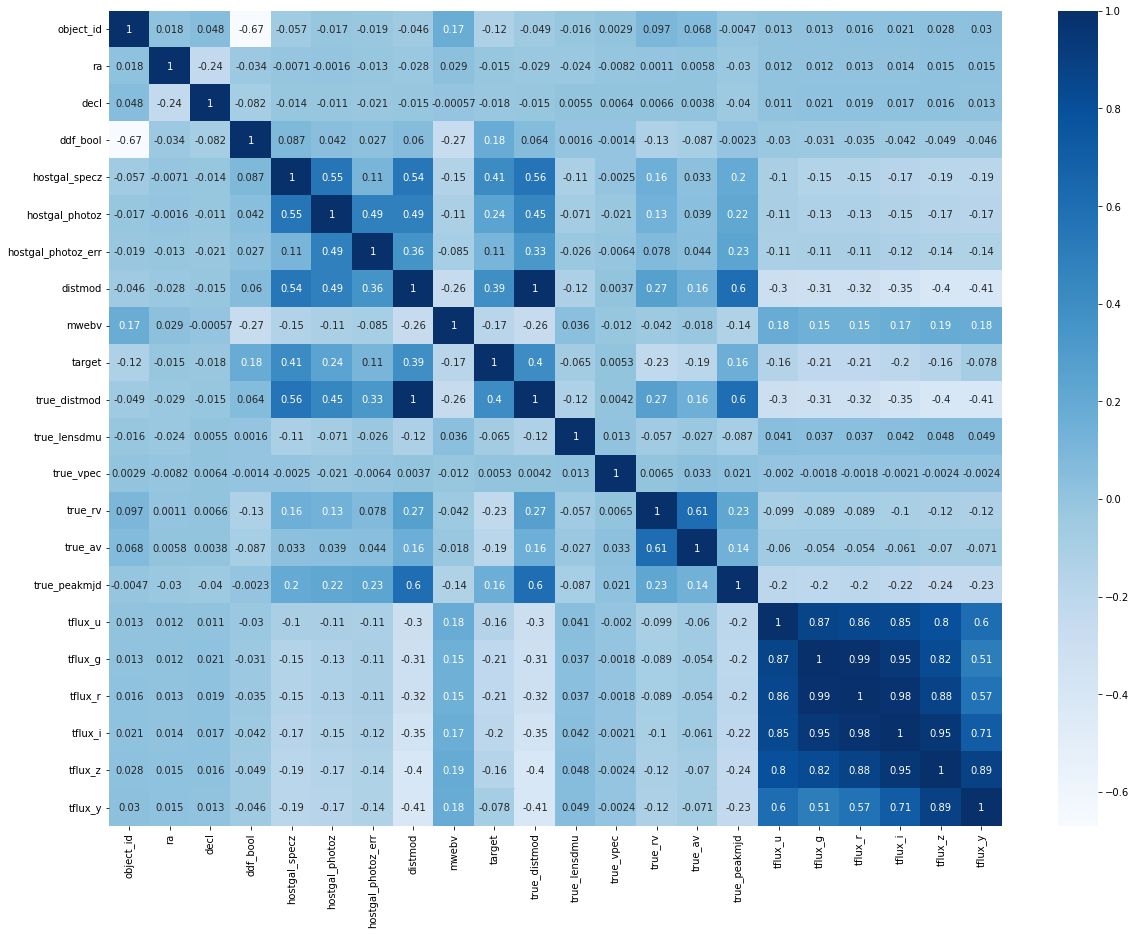

In [ ]:
# Correlation plot
plt.figure(figsize=(20, 15))
sns.heatmap(df.corr(), cmap = 'Blues', annot = True)

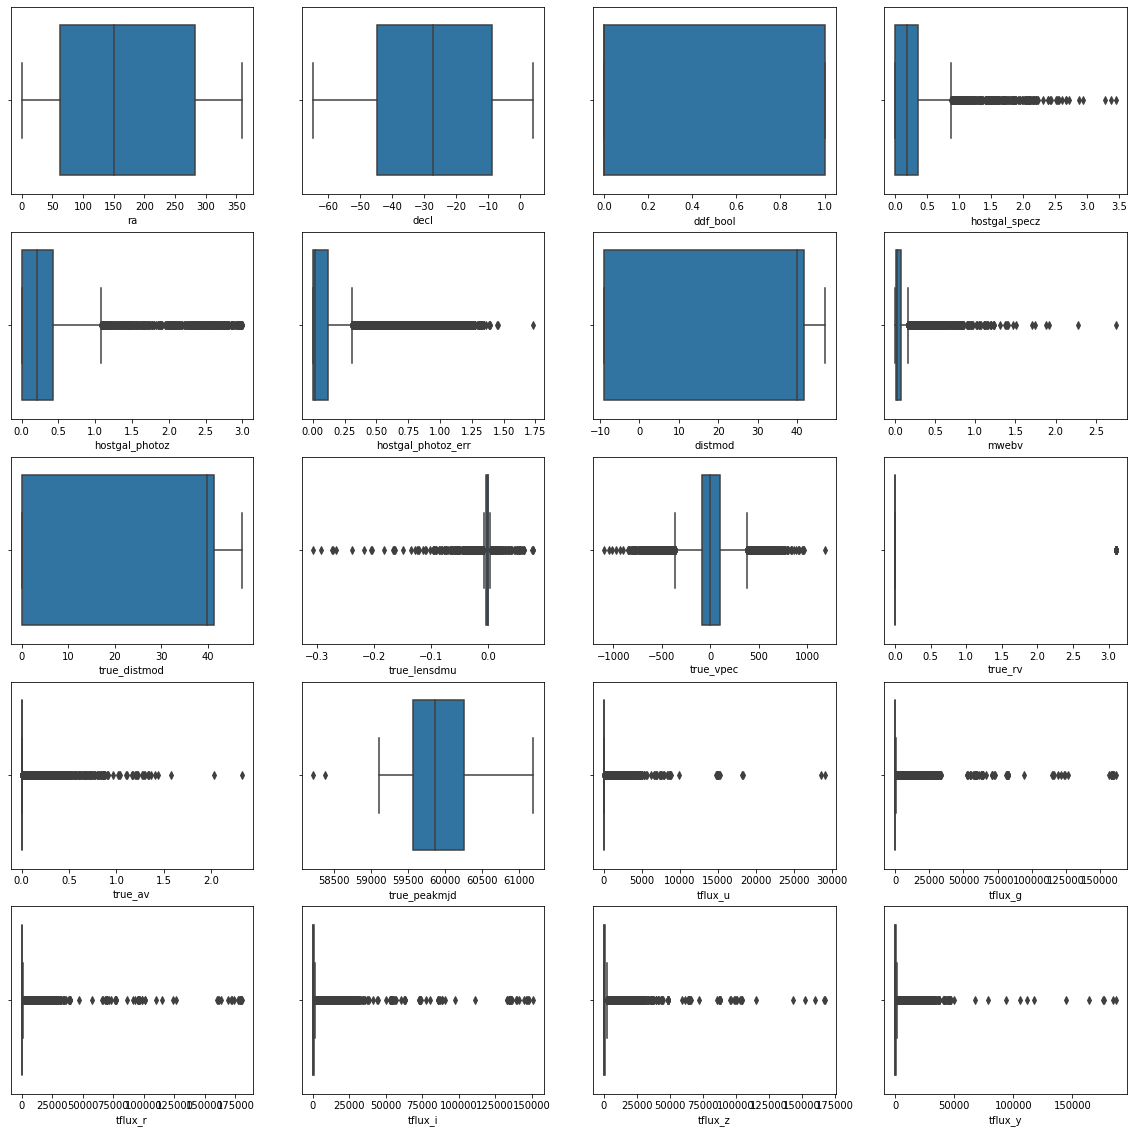

In [ ]:
df1 = df.drop(['object_id','target'], axis=1)
f, axes = plt.subplots(round(df1.shape[1]/4), 4, figsize = (20,20))  
y = 0
for idx in range(df1.shape[1]):
    i, j = divmod(y, 4)
    sns.boxplot(x=df1.iloc[:,idx], ax=axes[i, j])
    y = y + 1

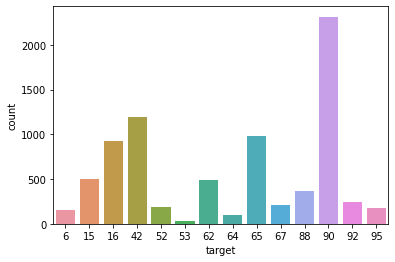

In [ ]:
sns.countplot(df.target)

# Data Pre-Processing

## 1. Outlier Treatment

In [ ]:
# Dealing with Outliers
def treat_outliers(column):
  Q1 = df[column].quantile(0.25)
  Q3 = df[column].quantile(0.75)
  IQR = Q3-Q1
  lower_bound = Q1-1.5*IQR
  upper_bound = Q3+1.5*IQR
  for row in range(df.shape[0]):
    if df.loc[row,column] < lower_bound or df.loc[row,column] > upper_bound:
      df.loc[row,column] = df[column].mean()

In [ ]:
columns = df.drop(['object_id','true_rv','target'],axis=1).columns
for column in columns:
  treat_outliers(column)

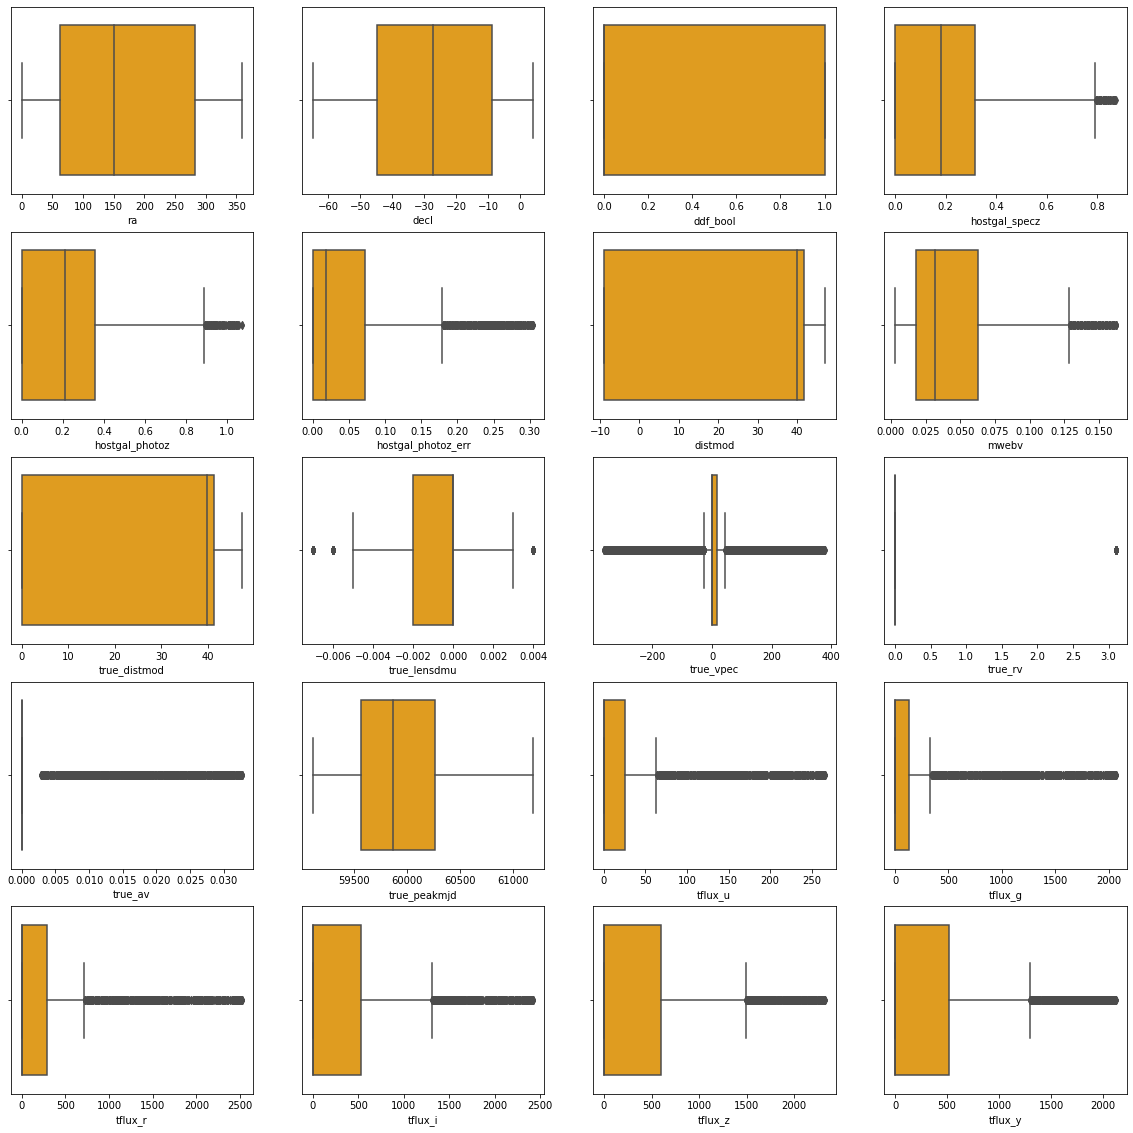

In [ ]:
columns = df.drop(['object_id','target'], axis=1).columns
f, axes = plt.subplots(round(len(columns)/4), 4, figsize = (20,20))  
y = 0
for column in columns:
    i, j = divmod(y, 4)
    sns.boxplot(x=df[column], ax=axes[i, j], color = 'orange')
    y = y + 1

## 2. Handling Imbalances

In [ ]:
sm = SMOTE()

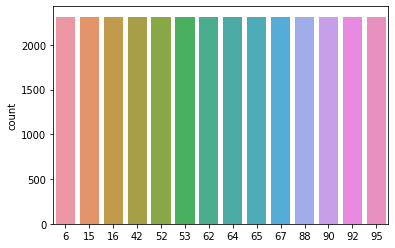

In [ ]:
X,y = sm.fit_resample(df.drop(['object_id','target'], axis = 1), df['target'])
sns.countplot(y)

In [ ]:
X = pd.DataFrame(X, columns = df.drop(['object_id','target'], axis=1).columns)

In [ ]:
X.shape , y.shape

((32382, 20), (32382,))

## 3. Splitting Data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.30, random_state = 42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((22667, 20), (9715, 20), (22667,), (9715,))

## 4. Scaling

In [ ]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
y = label.fit_transform(y)

In [ ]:
scaler = RobustScaler().fit(X)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Modelling

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier 
from sklearn.model_selection import GridSearchCV, cross_val_score, RandomizedSearchCV

# LightGBM

In [ ]:
from lightgbm import LGBMClassifier
clf_lgbm = LGBMClassifier()
param_grid_lgbm = {'learning_rate':[0.1,0.2,0.5], 'max_depth':[-1,1,3],'n_estimator':[100,200,300]}
grid_search_lgbm = GridSearchCV(clf_lgbm, param_grid_lgbm, scoring = 'accuracy',cv=kfold, verbose= 1 , n_jobs=-1)
grid_search_lgbm.fit(X_train,y_train)
print('Best Params= ',grid_search_lgbm.best_params_)
clf_lgbm = LGBMClassifier(**grid_search_lgbm.best_params_)
clf_lgbm.fit(X_train , y_train)
# scores = cross_val_score(estimator = clf_lgbm , X = X_test , y = y_test , scoring = 'accuracy' , cv = kfold)
# accuracy_lgbm = np.mean(scores)
# performance('Light GBM' , roc_auc_lgbm)
# print(accuracy_lgbm)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 135 out of 135 | elapsed:  7.7min finished


Best Params=  {'learning_rate': 0.5, 'max_depth': -1, 'n_estimator': 100}


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.5, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimator=100, n_estimators=100, n_jobs=-1, num_leaves=31,
               objective=None, random_state=None, reg_alpha=0.0, reg_lambda=0.0,
               silent=True, subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0)

In [ ]:
# print(grid_search_lgbm.best_params_)

# Model Evaluation

In [ ]:
from sklearn.metrics import classification_report, accuracy_score

In [ ]:
y_pred = clf_lgbm.predict(X_test)
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           6       1.00      1.00      1.00       710
          15       0.96      0.89      0.93       775
          16       0.88      0.90      0.89       703
          42       0.59      0.67      0.63       622
          52       0.92      0.90      0.91       738
          53       1.00      0.99      1.00       665
          62       0.77      0.88      0.82       594
          64       1.00      0.97      0.98       700
          65       0.92      0.98      0.95       609
          67       0.91      0.88      0.89       744
          88       1.00      1.00      1.00       705
          90       0.77      0.73      0.75       718
          92       0.93      0.87      0.90       738
          95       1.00      0.99      0.99       694

    accuracy                           0.90      9715
   macro avg       0.90      0.90      0.90      9715
weighted avg       0.91      0.90      0.90      9715



In [ ]:
accuracy_score(y_pred,y_test)

0.903448275862069